In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
import pickle
import seaborn as sns
import pandas as pd
from matplotlib import animation
from IPython.display import clear_output

%matplotlib widget
plt.rcParams['figure.figsize'] = [9, 8]

In [2]:
# Load data
dataset_path = os.path.join('cichy_data', 'subj0', 'MEG2_subj01_sess01_tsss_mc-3.fif')
raw = mne.io.read_raw_fif(dataset_path, preload=True)
chn_type = 'mag'
raw = raw.pick(chn_type)

Opening raw data file cichy_data/subj0/MEG2_subj01_sess01_tsss_mc-3.fif...
    Range : 4930000 ... 5162999 =   4930.000 ...  5162.999 secs
Ready.


/var/folders/nv/wjmf18wd5_j38vg9v0cthl5h0000gn/T/ipykernel_2303/2585180896.py:3: RuntimeWarning: This filename (cichy_data/subj0/MEG2_subj01_sess01_tsss_mc-3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(dataset_path, preload=True)


Reading 0 ... 232999  =      0.000 ...   232.999 secs...


In [3]:
path = os.path.join('..', 'results', 'cichy_epoched', 'all_noshuffle_wavenetclass_semb10_drop0.4', 'groupPFI',
                    'val_loss_PFIch4.npy')
pfi = np.load(open(path, 'rb'))
pfi = np.mean(pfi, axis=0)

In [4]:
pfi = pfi[0, 0] - pfi[:, 1:]

In [5]:
times = list(range(-50, 866, 4))
ticks = list(range(len(times)))

In [6]:
raw.info.update({'sfreq':250})
evoked = mne.EvokedArray(pfi.T, raw.info, tmin=-0.048)

In [9]:
times = np.arange(-0.048, 0.866, 0.004)
fig, anim = evoked.animate_topomap(
    times=times, ch_type='mag', frame_rate=24, time_unit='ms', blit=False, show=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

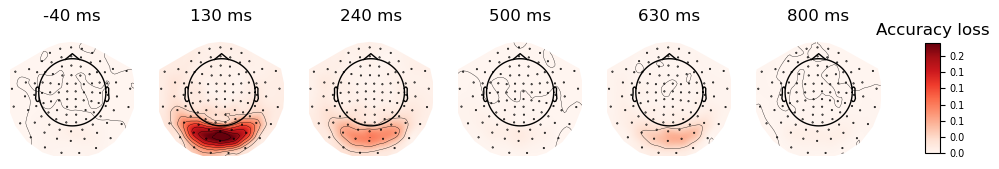

In [29]:
times = [-0.04, 0.13, 0.24, 0.5, 0.63, 0.8]
evoked.plot_topomap(times=times, ch_type='mag', time_unit='ms', scalings=1, units='Accuracy loss', vmin=0)

In [30]:
plt.savefig('/Users/ricsi/GoogleDrive/Projektek/The Brain Project/oxford/writings/neurips_figures/spatiotemporal_PFI.svg', format='svg')

In [3]:
path = os.path.join('..', 'results', 'cichy_epoched', 'all_noshuffle_wavenetclass_semb10_drop0.4', 'groupPFI',
                    'val_loss_PFIch1.npy')
pfi_ch1 = np.load(open(path, 'rb'))
pfi_ch1 = np.mean(pfi_ch1, axis=0)
pfi_ch1 = pfi_ch1[0, 0] - pfi_ch1[:, 1:]

evoked_ch1 = mne.EvokedArray(pfi_ch1.T, raw.info, tmin=0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

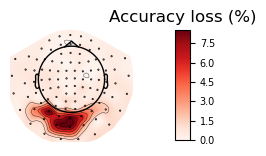

In [16]:
%matplotlib widget
evoked_ch1.plot_topomap(times=[0], ch_type='mag', time_unit='ms', scalings=100, units='Accuracy loss (%)', time_format='', vmin=0)

In [5]:
plt.savefig('/Users/ricsi/GoogleDrive/Projektek/The Brain Project/oxford/writings/neurips_figures/aggregate_PFIch.pdf', format='pdf')